In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data1 = pd.read_csv('nba.csv')

In [4]:
data1.shape

(458, 9)

In [5]:
data1.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [6]:
data1.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
data1.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [8]:
data1.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [9]:
data1.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C', nan], dtype=object)

In [10]:
data1.Team.unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz',
       nan], dtype=object)

In [11]:
data1.College.unique()

array(['Texas', 'Marquette', 'Boston University', 'Georgia State', nan,
       'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State', 'Ohio State',
       'Washington', 'Kentucky', 'North Carolina', 'Arizona',
       'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford', 'Syracuse',
       'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M', 'UCLA', 'UNLV',
       'Wichita State', "Saint Joseph's", 'Notre Dame', 'Norfolk State',
       'Duke', 'Murray State', 'Tennessee State', 'Bowling Green',
       'Purdue', 'Wake Forest', 'Michigan', 'Missouri', 'USC',
       'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson', 'Vanderbilt',
       'Michigan State', 'Florida', 'Washington State', 'Arizona State',
       'Oklahoma', 'Wyoming', "St. John's", 'Maryland', 'Wisconsin',
       'Utah Valley', 'North Carolina State', 'UC Santa Barbara',
       'Baylor', 'Connecticut', 'Oregon State', 'New Mexico', 'Oregon',
       'Creighton', 'Arkansas', 'Memphis', "Saint Mary's", 'Tennessee',
       'Alabama'

In [12]:
mode = data1['College'].mode()

In [13]:
data1['College'].fillna(mode[0], inplace=True)

In [14]:
data1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Kentucky,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,Kentucky,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Kentucky,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [15]:
data1['Height'].value_counts()

6-9     59
6-10    47
6-7     45
6-8     43
6-6     42
6-11    40
6-3     33
6-5     32
6-4     29
7-0     27
6-1     16
6-2     16
6-0     10
7-1      7
7-3      4
7-2      3
5-11     3
5-9      1
Name: Height, dtype: int64

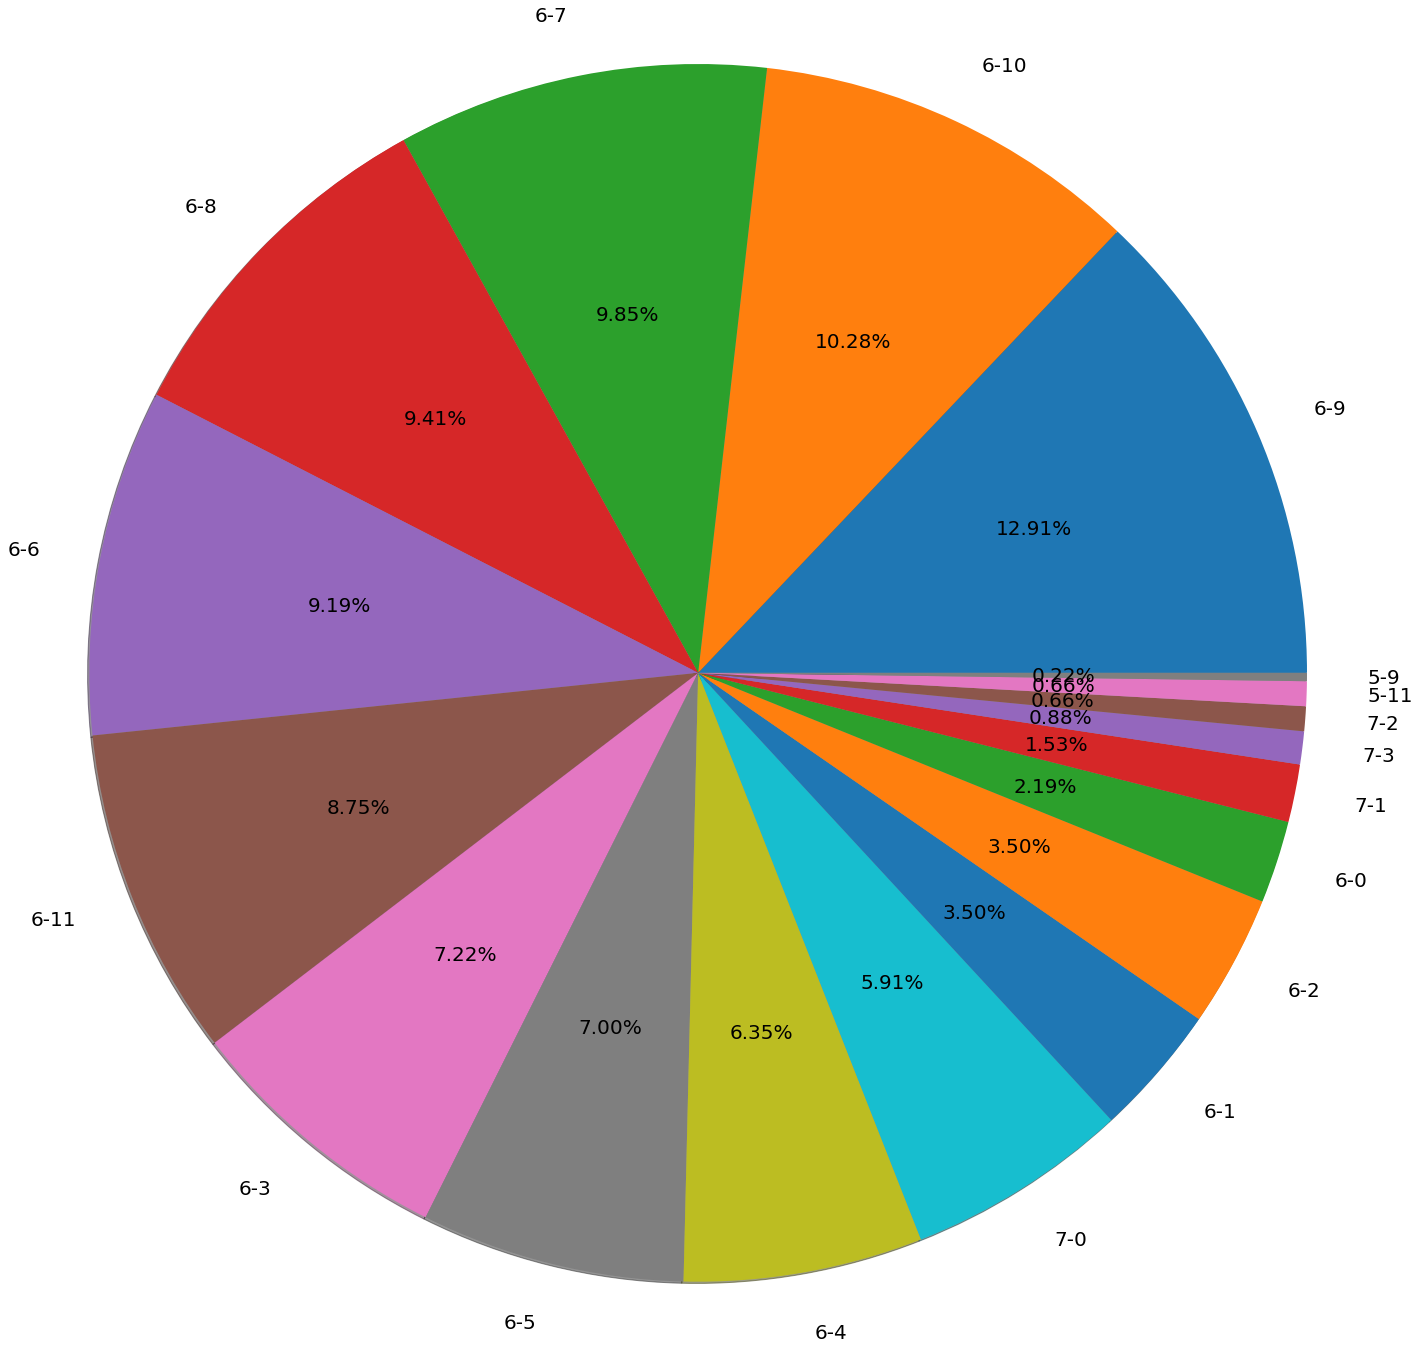

In [16]:
plt.pie(
    x=data1['Height'].value_counts(), 
    labels=data1['Height'].value_counts().index, 
    radius = 7,
    autopct = "%0.2f%%",
    shadow = True,
    textprops ={"fontsize":20},
)
plt.show()

In [17]:
data1['Salary'].fillna(data1['Salary'].mean(), inplace=True)

In [18]:
data1.shape

(458, 9)

In [19]:
data1.isnull().sum()

Name        1
Team        1
Number      1
Position    1
Age         1
Height      1
Weight      1
College     0
Salary      0
dtype: int64

In [20]:
data1.dropna(inplace=True)

In [21]:
data1.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [22]:
data1['Height'].value_counts()

6-9     59
6-10    47
6-7     45
6-8     43
6-6     42
6-11    40
6-3     33
6-5     32
6-4     29
7-0     27
6-1     16
6-2     16
6-0     10
7-1      7
7-3      4
7-2      3
5-11     3
5-9      1
Name: Height, dtype: int64

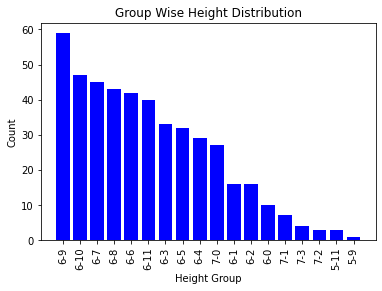

In [23]:
plt.bar(data1['Height'].value_counts().index , data1['Height'].value_counts(),  data = data1, color = "blue")
plt.xlabel("Height Group")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Group Wise Height Distribution")
plt.show()

In [24]:
heightgroups = data1.groupby(data1['Height'])

In [25]:
heightgroups.describe()

Number                                                         Age  \
        count       mean        std   min    25%   50%    75%   max count   
Height                                                                      
5-11      3.0  11.666667  12.583057   0.0   5.00  10.0  17.50  25.0   3.0   
5-9       1.0   4.000000        NaN   4.0   4.00   4.0   4.00   4.0   1.0   
6-0      10.0   4.400000   4.060651   0.0   1.00   4.0   7.00  12.0  10.0   
6-1      16.0  15.062500  16.794716   2.0   2.00  10.0  18.50  55.0  16.0   
6-10     47.0  20.340426  19.036894   0.0   7.00  15.0  31.00  90.0  47.0   
6-11     40.0  18.550000  15.790211   0.0   6.75  14.0  28.75  77.0  40.0   
6-2      16.0  12.875000  11.887669   0.0   1.75  12.0  19.50  32.0  16.0   
6-3      33.0  10.818182   9.231246   0.0   3.00   8.0  19.00  34.0  33.0   
6-4      29.0  13.551724  11.918132   2.0   5.00   9.0  20.00  55.0  29.0   
6-5      32.0  11.312500  12.390000   0.0   3.00   5.5  17.75  55.0  32.0   
6-6      42.0  14.690476  15.852196   0.0   5.25  11.0  19.75  99.0  42.0   
6-7      45.0  19.688889  12.491492   0.0  10.00  20.0  26.00  44.0  45.0   
6-8      43.0  21.302326  15.111545   1.0   6.00  22.0  33.50  55.0  43.0   
6-9      59.0  22.389831  19.110402   0.0   7.50  19.0  34.00  90.0  59.0   
7-0      27.0  25.370370  19.777898   0.0  11.50  21.0  40.50  92.0  27.0   
7-1       7.0  16.571429  12.067272   0.0   7.50  20.0  24.00  33.0   7.0   
7-2       3.0  36.333333  17.214335  17.0  29.50  42.0  46.00  50.0   3.0   
7-3       4.0  22.250000  13.913423   6.0  17.25  21.5  26.50  40.0   4.0   

                   ...  Weight        Salary                              \
             mean  ...     75%    max  count          mean           std   
Height             ...                                                     
5-11    25.333333  ...  185.00  195.0    3.0  5.891553e+05  7.926627e+05   
5-9     27.000000  ...  185.00  185.0    1.0  6.912869e+06           NaN   
6-0     29.200000  ...  188.75  205.0   10.0  5.784075e+06  6.337144e+06   
6-1     26.687500  ...  187.00  205.0   16.0  5.217919e+06  4.286013e+06   
6-10    27.468085  ...  251.00  289.0   47.0  5.185375e+06  5.063120e+06   
6-11    27.375000  ...  261.25  307.0   40.0  6.544397e+06  6.906416e+06   
6-2     27.187500  ...  191.25  200.0   16.0  3.523777e+06  3.631376e+06   
6-3     28.393939  ...  200.00  208.0   33.0  5.821784e+06  5.668225e+06   
6-4     26.172414  ...  213.00  220.0   29.0  4.646163e+06  5.275308e+06   
6-5     25.437500  ...  210.00  230.0   32.0  4.391786e+06  4.114296e+06   
6-6     26.190476  ...  220.00  245.0   42.0  3.586813e+06  4.518975e+06   
6-7     27.000000  ...  226.00  260.0   45.0  3.504402e+06  4.337857e+06   
6-8     26.767442  ...  240.00  260.0   43.0  5.950412e+06  6.133934e+06   
6-9     27.220339  ...  249.00  260.0   59.0  4.157787e+06  4.517154e+06   
7-0     26.407407  ...  262.50  280.0   27.0  5.287712e+06  4.675298e+06   
7-1     27.142857  ...  257.50  275.0    7.0  7.400988e+06  6.587462e+06   
7-2     28.666667  ...  259.00  270.0    3.0  6.835639e+06  7.825718e+06   
7-3     24.250000  ...  267.50  290.0    4.0  2.307930e+06  1.484918e+06   

                                                                   
              min        25%        50%           75%         max  
Height                                                             
5-11      55722.0   133733.0   211744.0  8.558720e+05   1500000.0  
5-9     6912869.0  6912869.0  6912869.0  6.912869e+06   6912869.0  
6-0      947276.0  2437500.0  3934473.5  4.846419e+06  21468695.0  
6-1      700902.0  1646160.0  3402626.5  8.633373e+06  13500000.0  
6-10     222888.0  1054584.5  3815000.0  7.025766e+06  19689000.0  
6-11     245177.0  1362370.0  3107656.0  1.143804e+07  22359364.0  
6-2      525093.0   947276.0  1553220.0  4.882013e+06  13437500.0  
6-3      189455.0  1662360.0  4053446.0  8.000000e+06  20093064.0  
6-4      134215.0  1015421.0  2525160.0  5.1

In [26]:
heightgroups['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Height,,,,,,,,
5-11,3.0,5.891553e+05,7.926627e+05,55722.0,133733.0,211744.0,8.558720e+05,1500000.0
5-9,1.0,6.912869e+06,NaN,6912869.0,6912869.0,6912869.0,6.912869e+06,6912869.0
6-0,10.0,5.784075e+06,6.337144e+06,947276.0,2437500.0,3934473.5,4.846419e+06,21468695.0
6-1,16.0,5.217919e+06,4.286013e+06,700902.0,1646160.0,3402626.5,8.633373e+06,13500000.0
6-10,47.0,5.185375e+06,5.063120e+06,222888.0,1054584.5,3815000.0,7.025766e+06,19689000.0
6-11,40.0,6.544397e+06,6.906416e+06,245177.0,1362370.0,3107656.0,1.143804e+07,22359364.0
6-2,16.0,3.523777e+06,3.631376e+06,525093.0,947276.0,1553220.0,4.882013e+06,13437500.0
6-3,33.0,5.821784e+06,5.668225e+06,189455.0,1662360.0,4053446.0,8.000000e+06,20093064.0
6-4,29.0,4.646163e+06,5.275308e+06,134215.0,1015421.0,2525160.0,5.192520e+06,20000000.0


In [27]:
data1.Age.value_counts()

24.0    47
25.0    45
27.0    41
23.0    41
26.0    36
28.0    31
30.0    31
29.0    28
22.0    26
31.0    22
21.0    19
20.0    19
33.0    14
32.0    13
36.0    10
34.0    10
35.0     9
38.0     4
37.0     4
40.0     3
39.0     2
19.0     2
Name: Age, dtype: int64

In [28]:
bins = [19, 25, 31, 36, 40]
labels = ['19-24', '25-30', '31-35', '36-40']
data1['AgeGroup'] = pd.cut(data1['Age'], bins = bins, labels = labels, right=False)

In [29]:
data1['AgeGroup'].value_counts()

25-30    212
19-24    154
31-35     68
36-40     20
Name: AgeGroup, dtype: int64

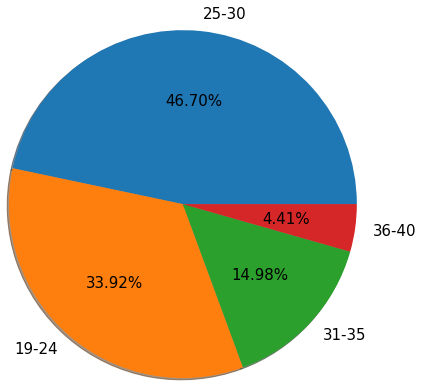

In [30]:
plt.pie(
    x=data1['AgeGroup'].value_counts(), 
    labels=data1['AgeGroup'].value_counts().index, 
    radius = 2,
    autopct = "%0.2f%%",
    shadow = True,
    textprops ={"fontsize":15},
)
plt.show()

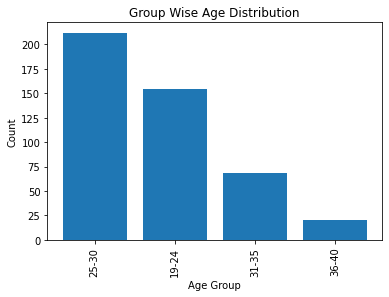

In [31]:
plt.bar(data1['AgeGroup'].value_counts().index , data1['AgeGroup'].value_counts(),  data = data1)
plt.xlabel("Age Group")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Group Wise Age Distribution")
plt.show()

In [32]:
data1.groupby('AgeGroup')['Salary'].mean()

AgeGroup
19-24    2.761705e+06
25-30    5.870999e+06
31-35    6.635271e+06
36-40    3.897656e+06
Name: Salary, dtype: float64

In [33]:
data1.groupby('AgeGroup')['Salary'].median()

AgeGroup
19-24    1.721380e+06
25-30    4.025000e+06
31-35    4.671342e+06
36-40    2.834470e+06
Name: Salary, dtype: float64

In [34]:
data1.groupby('AgeGroup')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
19-24,154.0,2.761705e+06,3.164929e+06,30888.0,1000000.00,1.721380e+06,3.150510e+06,16407501.0
25-30,212.0,5.870999e+06,5.471951e+06,55722.0,1100602.00,4.025000e+06,8.991574e+06,22359364.0
31-35,68.0,6.635271e+06,6.238296e+06,200600.0,2096417.75,4.671342e+06,9.667979e+06,22970500.0
36-40,20.0,3.897656e+06,5.373672e+06,222888.0,947276.00,2.834470e+06,4.276685e+06,25000000.0


In [35]:
listOfSalaries = list(data1.groupby('AgeGroup')['Salary'])

In [36]:
listOfSalaries

[('19-24',
  3       1148640.0
  6       1170960.0
  8       1824360.0
  9       3431040.0
  10      2569260.0
            ...    
  446    12000000.0
  447     1175880.0
  449     1348440.0
  452     2239800.0
  454      900000.0
  Name: Salary, Length: 154, dtype: float64),
 ('25-30',
  0      7.730337e+06
  1      6.796117e+06
  2      4.842684e+06
  4      5.000000e+06
  5      1.200000e+07
             ...     
  450    2.050000e+06
  451    9.813480e+05
  453    2.433333e+06
  455    2.900000e+06
  456    9.472760e+05
  Name: Salary, Length: 212, dtype: float64),
 ('31-35',
  19      6300000.0
  31      1635476.0
  33     22875000.0
  34      7402812.0
  43       947276.0
            ...    
  375    13000000.0
  394     4345000.0
  413     3750000.0
  415     3135000.0
  434     5016000.0
  Name: Salary, Length: 68, dtype: float64),
 ('36-40',
  46     4.842684e+06
  72     2.900000e+06
  93     5.675000e+06
  101    3.376000e+06
  102    9.477260e+05
  109    2.500000e+07
  119

In [37]:
listOfSalaries[-1]

('36-40',
 46     4.842684e+06
 72     2.900000e+06
 93     5.675000e+06
 101    3.376000e+06
 102    9.477260e+05
 109    2.500000e+07
 119    9.472760e+05
 139    1.449187e+06
 183    2.170465e+06
 236    8.333334e+06
 256    9.472760e+05
 259    5.000000e+06
 260    3.542500e+06
 261    4.088019e+06
 296    9.472760e+05
 299    2.814000e+06
 343    2.854940e+06
 392    9.472760e+05
 406    9.472760e+05
 420    2.228880e+05
 Name: Salary, dtype: float64)

## Part2 :  Using Iris Dataset

In [38]:
df2 = pd.read_csv("Iris.csv")
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
df2["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

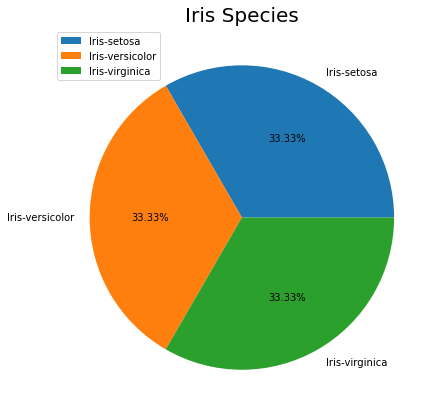

In [41]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
size = df2['Species'].value_counts()

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Iris Species', fontsize = 20)
plt.legend()
plt.show()

## Mean Values Group by Species 

In [42]:
# Displaying mean values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.mean())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


## Median Value Grouped By Species

In [43]:
# Displaying median values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.median())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.0           3.4           1.50           0.2
Iris-versicolor            5.9           2.8           4.35           1.3
Iris-virginica             6.5           3.0           5.55           2.0


## Standard Deviation Values Grouped by Species

In [44]:
# Displaying standard deviation values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.std())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           0.352490      0.381024       0.173511      0.107210
Iris-versicolor       0.516171      0.313798       0.469911      0.197753
Iris-virginica        0.635880      0.322497       0.551895      0.274650


## Mode values grouped by species:

In [45]:
# Displaying mode values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.value_counts().index[0])[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.1           3.4            1.5           0.2
Iris-versicolor            5.5           3.0            4.5           1.3
Iris-virginica             6.3           3.0            5.1           1.8


### Manual Calculation



In [46]:
for column in df2.select_dtypes(include=['int64', 'float64']):
    setosa = []
    versicolor = []
    virginica = []
    for i in range(len(df2)):
        if df2['Species'][i]=='Iris-setosa':
            setosa.append(df2[column][i])
        elif df2['Species'][i]=='Iris-versicolor':
            versicolor.append(df2[column][i])
        else:
            virginica.append(df2[column][i])
    print("No. of elements in Iris-Setosa : {}".format(len(setosa)))
    print("No. of elements in Iris-Versicolor : {}".format(len(versicolor)))
    print("No. of elements in Iris-Virginica : {}".format(len(virginica)))
    break

No. of elements in Iris-Setosa : 50
No. of elements in Iris-Versicolor : 50
No. of elements in Iris-Virginica : 50


In [47]:
for column in df2.select_dtypes(include=['int64', 'float64']):
    if column == 'Id':
        continue
    print("Mean for {} in cm".format(column))
    setosa = []
    versicolor = []
    virginica = []
    for i in range(len(df2)):
        if df2['Species'][i]=='Iris-setosa':
            setosa.append(df2[column][i])
        elif df2['Species'][i]=='Iris-versicolor':
            versicolor.append(df2[column][i])
        else:
            virginica.append(df2[column][i])
    print("Mean for Iris-Setosa:{}".format(sum(setosa)/len(setosa)))
    print("Mean for Iris-Versicolor:{}".format(sum(versicolor)/len(versicolor)))
    print("Mean for Iris-Virginica:{}".format(sum(virginica)/len(virginica)))
    print("==============================================")

Mean for SepalLengthCm in cm
Mean for Iris-Setosa:5.005999999999999
Mean for Iris-Versicolor:5.936
Mean for Iris-Virginica:6.587999999999998
Mean for SepalWidthCm in cm
Mean for Iris-Setosa:3.4180000000000006
Mean for Iris-Versicolor:2.7700000000000005
Mean for Iris-Virginica:2.9739999999999998
Mean for PetalLengthCm in cm
Mean for Iris-Setosa:1.464
Mean for Iris-Versicolor:4.26
Mean for Iris-Virginica:5.552
Mean for PetalWidthCm in cm
Mean for Iris-Setosa:0.2439999999999999
Mean for Iris-Versicolor:1.3259999999999998
Mean for Iris-Virginica:2.026


In [48]:
for column in df2.select_dtypes(include=['int64', 'float64']):
    if column == 'Id':
        continue
    print("Median for {} in cm".format(column))
    setosa = []
    versicolor = []
    virginica = []
    for i in range(len(df2)):
        if df2['Species'][i]=='Iris-setosa':
            setosa.append(df2[column][i])
        elif df2['Species'][i]=='Iris-versicolor':
            versicolor.append(df2[column][i])
        else:
            virginica.append(df2[column][i])
    print("Median for Iris-Setosa:{}".format((setosa[len(setosa)//2]+setosa[(len(setosa)-1)//2])/2))
    print("Median for Iris-Versicolor:{}".format((versicolor[len(versicolor)//2]+versicolor[(len(versicolor)-1)//2])/2))
    print("Median for Iris-Virginica:{}".format((virginica[len(virginica)//2]+virginica[(len(virginica)-1)//2])/2))
    print("=============================================================")

Median for SepalLengthCm in cm
Median for Iris-Setosa:4.9
Median for Iris-Versicolor:6.5
Median for Iris-Virginica:6.95
Median for SepalWidthCm in cm
Median for Iris-Setosa:3.2
Median for Iris-Versicolor:2.95
Median for Iris-Virginica:3.25
Median for PetalLengthCm in cm
Median for Iris-Setosa:1.75
Median for Iris-Versicolor:4.35
Median for Iris-Virginica:5.85
Median for PetalWidthCm in cm
Median for Iris-Setosa:0.2
Median for Iris-Versicolor:1.35
Median for Iris-Virginica:1.9500000000000002


In [49]:
for column in df2.select_dtypes(include=['int64', 'float64']):
    if column == 'Id':
        continue
    setosa = []
    versicolor = []
    virginica = []
    for i in range(len(df2)):
        if df2['Species'][i]=='Iris-setosa':
            setosa.append(df2[column][i])
        elif df2['Species'][i]=='Iris-versicolor':
            versicolor.append(df2[column][i])
        else:
            virginica.append(df2[column][i])
    mean_setosa = sum(setosa)/len(setosa)
    mean_versicolor = sum(versicolor)/len(versicolor)
    mean_virginica = sum(virginica)/len(virginica)
    variance_setosa = sum([((x - mean_setosa) ** 2) for x in setosa]) / len(setosa)
    variance_versicolor = sum([((x - mean_versicolor) ** 2) for x in versicolor]) / len(versicolor)
    variance_virginica = sum([((x - mean_virginica) ** 2) for x in virginica]) / len(virginica)
    print("Standard Deviation in {} for Iris-Setosa is : {}".format(column, variance_setosa**2))
    print("Standard Deviation in {} for Iris-Versicolor is : {}".format(column, variance_versicolor**2))
    print("Standard Deviation in {} for Iris-Virginica is : {}".format(column, variance_virginica**2))
    print("===================================================")

Standard Deviation in SepalLengthCm for Iris-Setosa is : 0.014826471695999982
Standard Deviation in SepalLengthCm for Iris-Versicolor is : 0.06817529881600005
Standard Deviation in SepalLengthCm for Iris-Virginica is : 0.15701881753599994
Standard Deviation in SepalWidthCm for Iris-Setosa is : 0.020242460176000003
Standard Deviation in SepalWidthCm for Iris-Versicolor is : 0.009312250000000003
Standard Deviation in SepalWidthCm for Iris-Virginica is : 0.010388501776000014
Standard Deviation in PetalLengthCm for Iris-Setosa is : 0.0008704860160000005
Standard Deviation in PetalLengthCm for Iris-Versicolor is : 0.04682896000000005
Standard Deviation in PetalLengthCm for Iris-Virginica is : 0.08909986201600012
Standard Deviation in PetalWidthCm for Iris-Setosa is : 0.00012687769599999991
Standard Deviation in PetalWidthCm for Iris-Versicolor is : 0.0014687289759999988
Standard Deviation in PetalWidthCm for Iris-Virginica is : 0.005464757775999998
